**Exercise 1**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

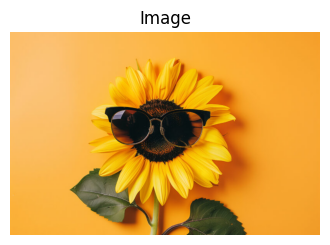

(525, 800, 3)

In [42]:
image = cv2.imread('image1.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Image', image)
image.shape

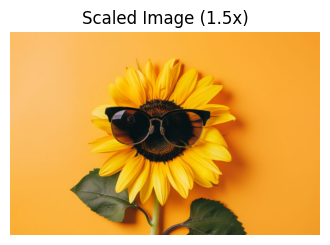

(787, 1200, 3)

In [43]:
h, w, _ = image.shape
scaled_image = cv2.resize(image, (int(w * 1.5), int(h * 1.5)), interpolation=cv2.INTER_LINEAR)
display_image('Scaled Image (1.5x)', scaled_image)
scaled_image.shape

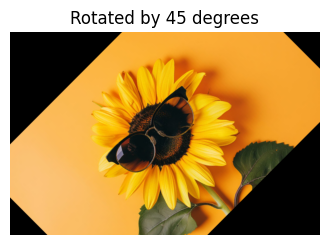

In [44]:
center = (w//2, h//2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image('Rotated by 45 degrees', rotated_image)

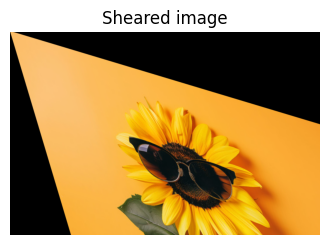

In [45]:
shear_factor = 0.3
shear_matrix = np.float32([[1, shear_factor, 0], [shear_factor, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (w, h))
display_image('Sheared image', sheared_image)

**Exercise 2**

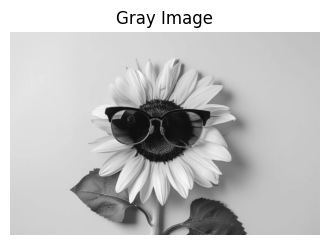

In [48]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
display_image('Gray Image', gray_image)

In [49]:
sift = cv2.SIFT_create()

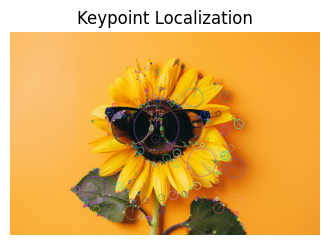

In [ ]:
# 1. Constructing a Scale Space: SIFT creates multiple blurred versions of the image to detect key points
#    across scales. This is handled internally by OpenCV’s SIFT implementation.


# 2. Key Point Localization: SIFT detects stable key points based on the differences of Gaussians (DoG) 
#    across scales and marks potential interest points. These are the points displayed in localized_image.
keypoints = sift.detect(gray_image, None)
image_w_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_image('Keypoint Localization', image_w_keypoints)

In [58]:
# 3. Orientation Assignment: For each key point, an orientation is assigned based on the dominant gradient 
#    direction within a local region around the key point. This is also handled by SIFT internally in OpenCV.
keypoints, descriptors = sift.compute(gray_image, keypoints)

In [59]:
# 4. Key Point Descriptor: The descriptor is a 128-element vector for each keypoint, encapsulating local 
#    gradient information. The output descriptors contains these vectors for all keypoints.
print(f"Number of keypoints detected: {len(keypoints)}")
print("Sample descriptor (first keypoint):")
print(descriptors[0])

Number of keypoints detected: 503
Sample descriptor (first keypoint):
[  3.  15. 160. 118.   0.   0.   0.   0.  83. 136.  90.  14.   0.   0.
   0.   0.  47.  29.   1.   0.   0.   0.   0.   1.   1.   0.   0.   1.
   1.   1.   0.   1.  47.  37. 113.  66.   1.   0.   1.   3. 181.  71.
  18.   2.   0.   0.   0.  12. 125.   8.   0.   0.   0.   0.   0.  12.
   2.   1.   0.   2.   2.   1.   0.   1.  72.  23.   6.  22.  14.   1.
   1.   6. 181.  37.   1.   1.   0.   0.   0.   3. 131.   6.   0.   0.
   0.   0.   0.   6.   1.   1.   0.   0.   3.   3.   1.   2.  68.  15.
   3.  35.  16.   3.   3.   2. 181.  55.   1.   1.   0.   0.   0.   1.
 104.  20.   0.   0.   0.   0.   0.   0.   1.   3.   1.   1.   1.   0.
   0.   0.]


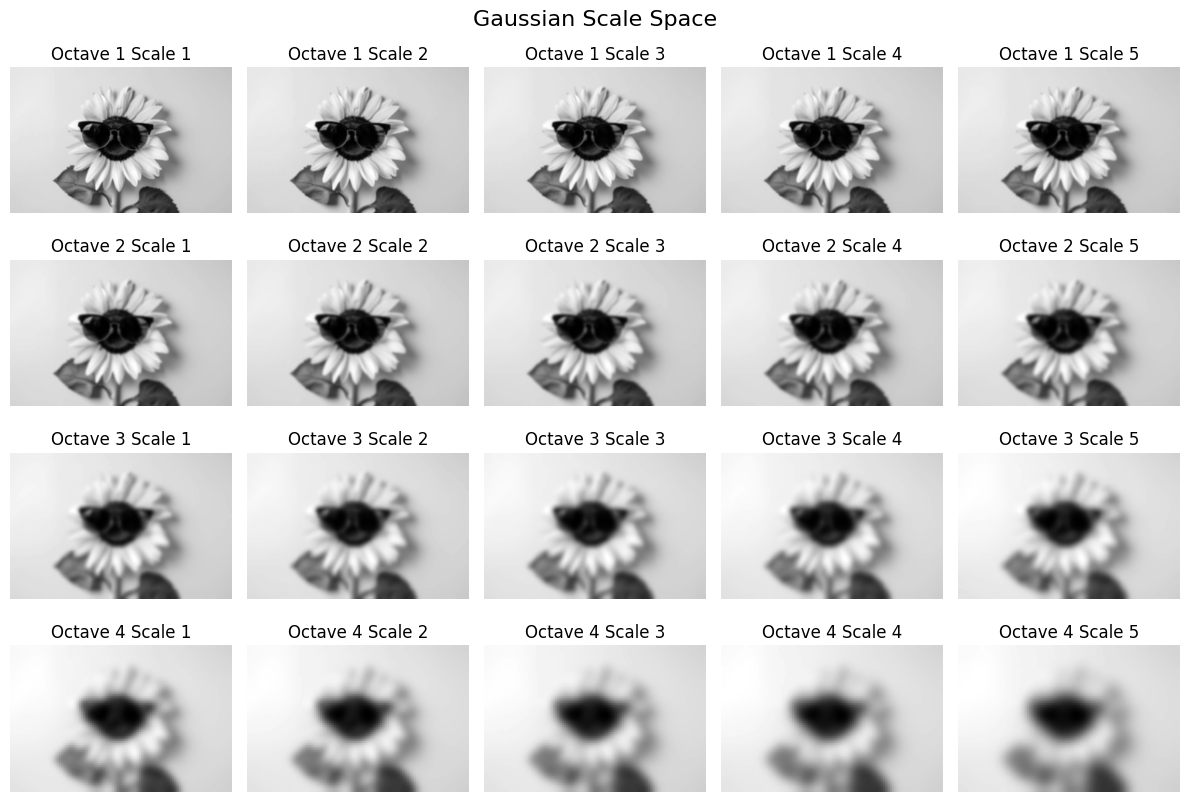

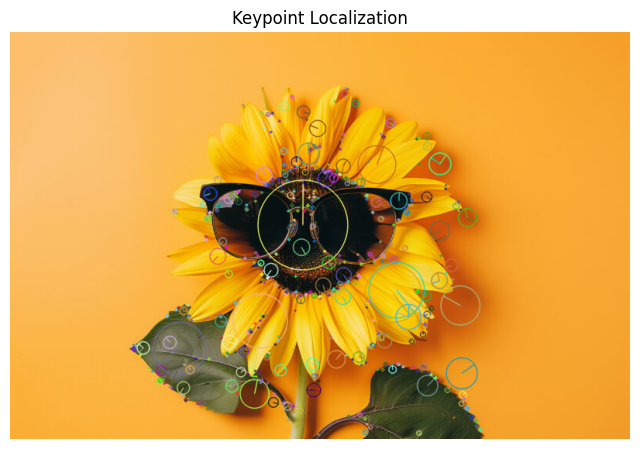

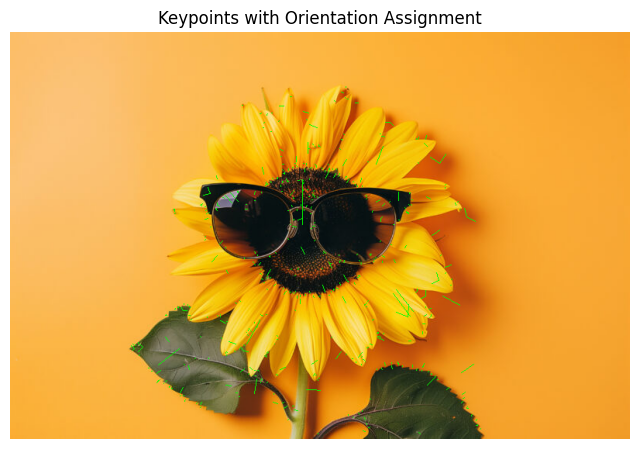

Number of keypoints detected: 503
Descriptor size: (503, 128)


ValueError: cannot reshape array of size 128 into shape (32,32)

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the Image
image = cv2.imread('image1.jpg')
if image is None:
    raise FileNotFoundError("Input image not found.")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# 1. Constructing a Scale Space
# Although OpenCV's SIFT handles scale space internally, we can visualize the Gaussian pyramid.

def display_scale_space(image, num_octaves=4, num_scales=5):
    gaussian_pyramid = []
    current_image = image.copy()
    for octave in range(num_octaves):
        octave_images = []
        for scale in range(num_scales):
            sigma = 1.6 * (2 ** (scale / num_scales))
            blurred = cv2.GaussianBlur(current_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
            octave_images.append(blurred)
        gaussian_pyramid.append(octave_images)
        # Downsample the image for the next octave
        current_image = cv2.pyrDown(current_image)
    return gaussian_pyramid

# Display Gaussian Pyramid
gaussian_pyramid = display_scale_space(gray)

plt.figure(figsize=(12, 8))
for octave in range(len(gaussian_pyramid)):
    for scale in range(len(gaussian_pyramid[octave])):
        plt.subplot(len(gaussian_pyramid), len(gaussian_pyramid[octave]), octave * len(gaussian_pyramid[octave]) + scale + 1)
        plt.imshow(gaussian_pyramid[octave][scale], cmap='gray')
        plt.title(f"Octave {octave+1} Scale {scale+1}")
        plt.axis('off')
plt.tight_layout()
plt.suptitle("Gaussian Scale Space", fontsize=16, y=1.02)
plt.show()

# 2. Keypoint Localization
# Detect keypoints using SIFT
keypoints = sift.detect(gray, None)

# Draw keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Localization")
plt.axis('off')
plt.show()

# 3. Orientation Assignment
# Each keypoint has an orientation assigned by SIFT
# To visualize, we'll color keypoints based on their orientation

def draw_keypoints_with_orientation(image, keypoints):
    image_with_orientations = image.copy()
    for kp in keypoints:
        angle = kp.angle
        x, y = kp.pt
        length = kp.size * 0.5  # Length of the orientation line
        # Calculate the end point of the line
        end_x = int(x + length * np.cos(np.deg2rad(angle)))
        end_y = int(y + length * np.sin(np.deg2rad(angle)))
        # Draw the line
        cv2.line(image_with_orientations, (int(x), int(y)), (end_x, end_y), (0, 255, 0), 1)
    return image_with_orientations

image_with_orientations = draw_keypoints_with_orientation(image, keypoints)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_orientations, cv2.COLOR_BGR2RGB))
plt.title("Keypoints with Orientation Assignment")
plt.axis('off')
plt.show()

# 4. Keypoint Descriptor
# Compute descriptors for the keypoints
keypoints, descriptors = sift.compute(gray, keypoints)

print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor size: {descriptors.shape}")

# Visualize the first keypoint's descriptor as an image
def visualize_descriptor(descriptor):
    descriptor_image = descriptor.reshape(4, 4, 8).transpose(1, 0, 2).reshape(32, 32)
    plt.figure(figsize=(4, 4))
    plt.imshow(descriptor_image, cmap='gray')
    plt.title("Sample Keypoint Descriptor")
    plt.axis('off')
    plt.show()

if len(descriptors) > 0:
    visualize_descriptor(descriptors[0])

# Alternatively, visualize all keypoints with their descriptors using OpenCV's built-in function
# Note: This can be very cluttered if there are many keypoints
# Uncomment the lines below to visualize

# image_with_descriptors = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.figure(figsize=(8, 6))
# plt.imshow(cv2.cvtColor(image_with_descriptors, cv2.COLOR_BGR2RGB))
# plt.title("Keypoints with Descriptors")
# plt.axis('off')
# plt.show()